# 임베딩 내 편향성 알아보기 [프로젝트]


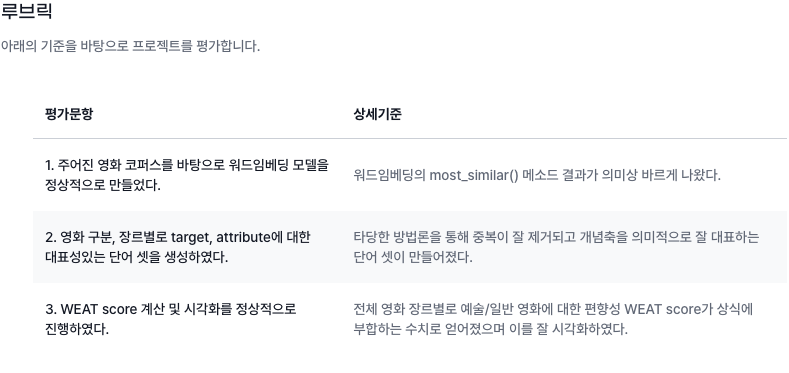

영화 구분은 주제별 단어를 뽑는게 적합한거 같아 LDA를 진행\
장르 구분은 장르별 쓰이는 문구나 단어가 비슷할것으로 예상되어 빈도 기반 TF-IDF진행\
혼합하여 WEAT score 측정

## STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [1]:
# data load
import os

with open(os.getenv('HOME')+'/GoingDeeper/data/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

실습에서 okt를 사용하여 프로젝트에서는 mecab을 사용하여 진행

품사 태그 - 체언

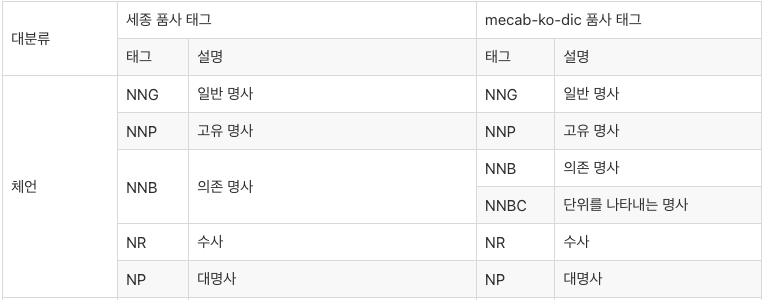

[KoNLPy 형태소 분석기 품사 태그 비교](https://datascienceschool.net/03%20machine%20learning/03.01.02%20KoNLPy%20%ED%95%9C%EA%B5%AD%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html)

In [2]:
# mecab 활용
from konlpy.tag import Mecab
mecab = Mecab()
tokenized = []
with open(os.getenv('HOME')+'/GoingDeeper/data/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = mecab.pos(line)
        res = []
        # 명사만 추출
        for word in words:
            if word[1] in ['NNG', 'NNP', 'NNB', 'NNBC', 'NP', 'NR']:
                res.append(word[0])
        tokenized.append(res)

In [3]:
print(len(tokenized))

71156


## STEP 2. 추출된 결과로 embedding model 만들기

In [4]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 Word2Vec 모델을 학습 (gensim 4.0 기준) - cbow 사용(sg=0), skip-gram은 sg=1
model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count = 3,sg=0, workers=4)
model.wv.most_similar(positive=['영화'])

[('작품', 0.8766270875930786),
 ('드라마', 0.8607566356658936),
 ('다큐멘터리', 0.8493425846099854),
 ('차이밍량', 0.8415458798408508),
 ('옴니버스', 0.83614581823349),
 ('소재', 0.8261165022850037),
 ('코미디', 0.8231194615364075),
 ('주제', 0.8201689124107361),
 ('감동', 0.8129613399505615),
 ('형식', 0.8077026605606079)]

In [5]:
model.wv.most_similar(positive=['사랑'])

[('만남', 0.7438571453094482),
 ('연애관', 0.742577075958252),
 ('령기', 0.7221310138702393),
 ('가슴', 0.7199863791465759),
 ('종무', 0.7188496589660645),
 ('운명', 0.713875412940979),
 ('지골', 0.7134237885475159),
 ('실연', 0.713069498538971),
 ('애정', 0.710244357585907),
 ('아픔', 0.7098339200019836)]

령기???

In [6]:
model.wv.most_similar(positive=['연극'])

[('에피소드', 0.9049346446990967),
 ('개성', 0.8926932215690613),
 ('연기', 0.8898373246192932),
 ('대본', 0.8880234956741333),
 ('영감', 0.8868496417999268),
 ('출연', 0.8817946910858154),
 ('아역', 0.8799758553504944),
 ('스타일', 0.8782951831817627),
 ('배우', 0.8739513158798218),
 ('차이밍량', 0.8733997344970703)]

차이밍량 - 영화감독

## STEP 3. target, attribute 단어 셋 만들기 - LDA & TF-IDF

LDA 기반 데이터를 가장 잘 표현하는 단어 셋 만들기

두 축을 영화 장르, 영화 구분 정보로 이용
- 영화 구분
  - synopsis_art.txt : 예술영화
  - synopsis_gen.txt : 일반영화(상업영화)

- 장르 구분
  - synopsis_SF.txt: SF
  - synopsis_family.txt : 가족
  - synopsis_show.txt : 공연
  - synopsis_horror.txt : 공포(호러)
  - synopsis_documentary.txt : 다큐멘터리
  - synopsis_drama.txt : 드라마
  - synopsis_romance.txt : 멜로로맨스
  - synopsis_mystery.txt : 미스터리
  - synopsis_crime.txt : 범죄
  - synopsis_historical.txt : 사극
  - synopsis_western.txt : 서부극(웨스턴)
  - synopsis_adult.txt : 성인물(에로)
  - synopsis_thriller.txt : 스릴러
  - synopsis_animation.txt : 에니메이션
  - synopsis_action.txt : 액션
  - synopsis_adventure.txt : 어드벤처
  - synopsis_war.txt : 전쟁
  - synopsis_comedy.txt : 코미디
  - synopsis_fantasy.txt : 판타지

'synopsis_art.txt', 'synopsis_gen.txt' 두 파일을 읽고, 위에서 했던 것과 마찬가지로 명사에 대해서만 추출

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    mecab = Mecab()
    result = []
    with open(os.getenv('HOME')+'/GoingDeeper/data/weat/'+file_name, 'r') as file:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = file.readline()
            if not line: break
            # 명사 추출
            tokenlist = mecab.pos(line)
            for word in tokenlist:
                if word[1] in ['NNG', 'NNP', 'NNB', 'NNBC', 'NP', 'NR']:
                    result.append(word[0])
    return ' '.join(result)

In [37]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


예술영화를 잘 대표하는 단어란 예술영화 시놉시스에는 자주 나타나지만\
그 외 다른 구분의 영화(예를 들어 일반영화) 시놉시스에는 자주 나타나지 않는 것을 고르는 것
-> TF-IDF

### 영화 구분 - LDA

In [45]:
vectorizer = TfidfVectorizer()
art_matrix = vectorizer.fit_transform([art])
gen_matrix = vectorizer.fit_transform([gen])

In [49]:
# LDA 모델 학습
from sklearn.decomposition import LatentDirichletAllocation

lda_art = LatentDirichletAllocation(n_components=3, learning_method='online', max_iter=25, random_state=0)
lda_gen = LatentDirichletAllocation(n_components=3, learning_method='online', max_iter=25, random_state=0)

# 예술 영화와 상업 영화에 대해 각각 학습
art_topic_matrix = lda_art.fit_transform(art_matrix)
gen_topic_matrix = lda_gen.fit_transform(gen_matrix)


In [50]:
# 각 토픽에서 상위 단어 추출
feature_names = vectorizer.get_feature_names_out()

def extract_top_words(lda_model, feature_names, n_top_words=15):
    topics = []
    for topic_idx, topic in enumerate(lda_model.components_):
        # 각 토픽에서 가중치가 높은 단어를 추출
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append((f"Topic {topic_idx+1}", top_words))
    return topics

In [57]:
# 예술 영화 상위 단어 추출
art_topics = extract_top_words(lda_art, feature_names)
print("예술 영화 상위 단어:")
for topic, words in art_topics:
    print(f"{topic}: {', '.join(words)}")

# 일반 영화 상위 단어 추출
gen_topics = extract_top_words(lda_gen, feature_names)
print("\n일반 영화 상위 단어:")
for topic, words in gen_topics:
    print(f"{topic}: {', '.join(words)}")

예술 영화 상위 단어:
Topic 1: 방섭, 고락, 바클리, 린이, 대접전, 사춘기, 마야, 단시간, 동문, 목인, 멕시코인, 고도성장, 모닝, 김병수, 박전
Topic 2: 계두, 버터, 마스코트, 뒷자락, 뒷일, 사이타마현, 무정부주의자, 관력, 몰입, 가고시마, 나열, 발송, 렌스, 뒤라스, 마르틴
Topic 3: 스기모토, 매무새, 맛보, 둔갑, 디츠, 나우, 발생량, 산자, 드레스덴, 교무, 내쉬, 소호, 몽고, 내심, 명상록

일반 영화 상위 단어:
Topic 1: 쿠리하라, 절제술, 방섭, 시위자, 고락, 신봉선, 제수씨, 바클리, 린이, 촘스키, 실마리, 사춘기, 대접전, 절대다수, 마야
Topic 2: 성모, 영재교육, 레파, 레오노어, 이자카야, 알피, 다릭, 윤주상, 프리아모스, 우철, 콰이어트, 스투어트, 달빛, 국세청, 채용
Topic 3: 자신, 영화제, 그녀, 사람, 시작, 영화, 친구, 국제, 사랑, 남자, 이야기, 여자, 서울, 사건, 가족


인물 관련 키워드가 대체적으로 많은 느낌이고 생각보다 다양하게 분리된거같다.

In [58]:
# 예술 영화 상위 단어를 통합하여 Target 단어 집합 생성
art_words = set()
for _, words in art_topics:
    art_words.update(words)

# 일반 영화 상위 단어를 통합하여 Target 단어 집합 생성
gen_words = set()
for _, words in gen_topics:
    gen_words.update(words)

print("예술 영화 Target 후보 단어:", art_words)
print("일반 영화 Target 후보 단어:", gen_words)

예술 영화 Target 후보 단어: {'고도성장', '마르틴', '박전', '몽고', '린이', '나열', '드레스덴', '둔갑', '바클리', '디츠', '내쉬', '뒷자락', '나우', '명상록', '버터', '뒤라스', '뒷일', '목인', '계두', '모닝', '무정부주의자', '소호', '고락', '몰입', '단시간', '마스코트', '대접전', '멕시코인', '방섭', '렌스', '관력', '맛보', '발생량', '내심', '동문', '사이타마현', '교무', '스기모토', '매무새', '마야', '산자', '사춘기', '김병수', '발송', '가고시마'}
일반 영화 Target 후보 단어: {'스투어트', '사람', '우철', '국제', '가족', '실마리', '린이', '여자', '제수씨', '절대다수', '바클리', '달빛', '채용', '알피', '프리아모스', '남자', '윤주상', '절제술', '친구', '국세청', '고락', '사랑', '시위자', '대접전', '레오노어', '이자카야', '방섭', '다릭', '시작', '영화', '촘스키', '쿠리하라', '성모', '그녀', '콰이어트', '이야기', '영화제', '사건', '마야', '서울', '영재교육', '신봉선', '자신', '사춘기', '레파'}


In [59]:
# 공통 단어 제거
common_words = art_words & gen_words
art_unique_words = art_words - common_words
gen_unique_words = gen_words - common_words

print("예술 영화 고유 Target 단어:", art_unique_words)
print("상업 영화 고유 Target 단어:", gen_unique_words)
print("공통 단어:", common_words)

예술 영화 고유 Target 단어: {'고도성장', '마르틴', '박전', '몽고', '나열', '드레스덴', '둔갑', '디츠', '내쉬', '뒷자락', '나우', '명상록', '버터', '뒤라스', '뒷일', '목인', '계두', '모닝', '무정부주의자', '소호', '몰입', '단시간', '마스코트', '멕시코인', '렌스', '관력', '맛보', '발생량', '내심', '동문', '사이타마현', '교무', '스기모토', '매무새', '산자', '김병수', '발송', '가고시마'}
상업 영화 고유 Target 단어: {'스투어트', '사람', '우철', '국제', '가족', '실마리', '여자', '제수씨', '절대다수', '달빛', '채용', '알피', '프리아모스', '남자', '윤주상', '절제술', '친구', '국세청', '사랑', '시위자', '레오노어', '이자카야', '다릭', '시작', '영화', '촘스키', '쿠리하라', '성모', '그녀', '콰이어트', '이야기', '영화제', '사건', '서울', '영재교육', '신봉선', '자신', '레파'}
공통 단어: {'대접전', '바클리', '방섭', '마야', '사춘기', '린이', '고락'}


In [77]:
# 고유 단어 중 LDA 가중치 기반으로 상위 단어 선정
def select_top_words_by_weight_with_embedding(lda_model, feature_names, unique_words, model, n_top=15):
    """
    LDA 가중치와 임베딩 모델 포함 조건으로 상위 단어 선정
    """
    top_words = []
    for topic in lda_model.components_:
        for word in unique_words:
            if word in feature_names and word in model.wv:  # 임베딩 모델에 포함된 단어만 고려
                word_idx = list(feature_names).index(word)
                weight = topic[word_idx]
                top_words.append((word, weight))
    # 가중치 순서로 정렬 후 상위 n개 선택
    top_words = sorted(top_words, key=lambda x: x[1], reverse=True)[:n_top]
    return [word for word, _ in top_words]


# 예술 영화 Target 단어
target_art = select_top_words_by_weight_with_embedding(lda_art, feature_names, art_unique_words, model)
print("예술 영화 Target 단어:", target_art)

# 상업 영화 Target 단어
target_gen = select_top_words_by_weight_with_embedding(lda_gen, feature_names, gen_unique_words, model)
print("상업 영화 Target 단어:", target_gen)

예술 영화 Target 단어: ['버터', '마스코트', '무정부주의자', '몰입', '나열', '발송', '렌스', '마르틴', '스기모토', '둔갑', '디츠', '나우', '동문', '멕시코인', '산자']
상업 영화 Target 단어: ['자신', '영화제', '그녀', '사람', '시작', '영화', '친구', '국제', '사랑', '남자', '이야기', '여자', '서울', '사건', '가족']


### 장르 구분

In [78]:
# 장르 대표 단어 
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']

genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [79]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [80]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 44872)


In [81]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 자신, 지구, 시작, 사람, 인류, 인간, 세계, 우주, 미래, 그녀, 로봇, 박사, 친구, 외계, 거대, 
가족: 엄마, 아빠, 영화제, 가족, 자신, 친구, 아버지, 시작, 그녀, 아들, 사랑, 마을, 국제, 낙타, 할머니, 
공연: 사랑, 오페라, 비올레타, 실황, 스카르피, 토스카, 백작, 자신, 카바, 레오노라, 그녀, 공연, 알프레도, 오텔로, 리골레토, 
공포(호러): 친구, 시작, 사람, 자신, 그녀, 공포, 사건, 발견, 죽음, 남자, 마을, 영화, 이상, 여자, 가족, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 남자, 그녀, 여자, 친구, 사랑, 시작, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 다큐멘터리, 국제, 사람, 이야기, 감독, 자신, 서울, 우리, 세계, 여성, 시작, 그녀, 
드라마: 자신, 영화제, 그녀, 사랑, 영화, 사람, 시작, 남자, 친구, 국제, 여자, 이야기, 엄마, 단편, 가족, 
멜로로맨스: 그녀, 사랑, 남자, 자신, 친구, 여자, 시작, 남편, 사람, 섹스, 마음, 결혼, 아내, 관계, 부부, 
뮤지컬: 뮤지컬, 사랑, 지모도, 에스메랄다, 영화, 프롤, 그녀, 스카르피, 음악, 충무로, 모차르트, 카바, 자신, 영화제, 토스카, 
미스터리: 사건, 그녀, 시작, 자신, 사람, 친구, 사고, 발견, 진실, 죽음, 기억, 남자, 아내, 살인, 민혁, 
범죄: 사건, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 수사, 여자, 발견, 
사극: 조선, 시작, 사랑, 신기전, 자신, 춘향, 아가멤논, 그녀, 채선, 루안, 황제, 최고, 운명, 사람, 트로이, 
서부극(웨스턴): 아이삭, 보안관, 챔벌린, 서부, 카우보이, 헨리, 마을, 자신, 개릿, 아르만도, 사냥, 레이프, 바인, 시작, 서부극, 
성인물(에로): 그녀, 남편, 성애, 자신, 관계, 남자, 섹스, 정사, 영화, 마사지, 여자, 시작, 친구, 유부녀, 마음, 
스릴러: 자신, 그녀

단어 셋이 적어서 중복 삭제 x

## STEP 4. WEAT score 계산과 시각화

In [82]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b


def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [83]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [84]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [85]:
# 결과 저장 리스트 초기화
filtered_results = []

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        # 소수점 3째 자리까지 출력
        score = matrix[i][j]
        print(f'{genre_name[i]} & {genre_name[j]}: {score:.3f}')
        
        # 조건에 맞는 값만 저장
        if score >= 0.8 or score <= -0.8:
            filtered_results.append((genre_name[i], genre_name[j], score))

SF & 가족: 1.048
SF & 공연: 0.758
SF & 공포(호러): 1.312
SF & 기타: 1.184
SF & 다큐멘터리: 0.799
SF & 드라마: 1.423
SF & 멜로로맨스: 1.132
SF & 뮤지컬: 0.854
SF & 미스터리: 1.023
SF & 범죄: 0.601
SF & 사극: 1.164
SF & 서부극(웨스턴): 0.895
SF & 성인물(에로): 1.175
SF & 스릴러: 0.961
SF & 애니메이션: 0.422
SF & 액션: 0.501
SF & 어드벤처: 1.313
SF & 전쟁: -0.856
SF & 코미디: 1.519
SF & 판타지: 1.389
가족 & 공연: -0.738
가족 & 공포(호러): 0.591
가족 & 기타: 0.240
가족 & 다큐멘터리: -0.093
가족 & 드라마: 0.671
가족 & 멜로로맨스: 0.775
가족 & 뮤지컬: -0.178
가족 & 미스터리: 0.289
가족 & 범죄: -0.228
가족 & 사극: -0.407
가족 & 서부극(웨스턴): -0.739
가족 & 성인물(에로): 0.702
가족 & 스릴러: 0.269
가족 & 애니메이션: -0.520
가족 & 액션: -0.655
가족 & 어드벤처: 0.142
가족 & 전쟁: -1.206
가족 & 코미디: 0.895
가족 & 판타지: 0.038
공연 & 공포(호러): 0.918
공연 & 기타: 1.038
공연 & 다큐멘터리: 0.328
공연 & 드라마: 1.525
공연 & 멜로로맨스: 1.025
공연 & 뮤지컬: 0.472
공연 & 미스터리: 0.614
공연 & 범죄: 0.132
공연 & 사극: 0.489
공연 & 서부극(웨스턴): 0.097
공연 & 성인물(에로): 1.112
공연 & 스릴러: 0.585
공연 & 애니메이션: -0.157
공연 & 액션: -0.179
공연 & 어드벤처: 0.731
공연 & 전쟁: -1.047
공연 & 코미디: 1.392
공연 & 판타지: 0.903
공포(호러) & 기타: -0.275
공포(호러) & 다큐멘터

In [86]:
# 0.8 이상 또는 -0.8 이하인 값 정렬 (절대값 기준 내림차순)
filtered_results = sorted(filtered_results, key=lambda x: (x[2]), reverse=True)

# 0.8 이상 또는 -0.8 이하인 값 출력
print("\nFiltered Results (0.8 이상 또는 -0.8 이하):")
for result in filtered_results:
    if result[2] >= 0.8:
        # 양수 값 출력
        print(f"예술 영화는 {result[0]}, 일반 영화는 {result[1]} 장르에 가깝다, score = {result[2]:.3f}")
    elif result[2] <= -0.8:
        # 음수 값 출력 (값 반대로 설정)
        print(f"예술 영화는 {result[1]}, 일반 영화는 {result[0]} 장르에 가깝다, score = {result[2]:.3f}")


Filtered Results (0.8 이상 또는 -0.8 이하):
예술 영화는 공연, 일반 영화는 드라마 장르에 가깝다, score = 1.525
예술 영화는 SF, 일반 영화는 코미디 장르에 가깝다, score = 1.519
예술 영화는 전쟁, 일반 영화는 코미디 장르에 가깝다, score = 1.465
예술 영화는 SF, 일반 영화는 드라마 장르에 가깝다, score = 1.423
예술 영화는 공연, 일반 영화는 코미디 장르에 가깝다, score = 1.392
예술 영화는 SF, 일반 영화는 판타지 장르에 가깝다, score = 1.389
예술 영화는 전쟁, 일반 영화는 판타지 장르에 가깝다, score = 1.334
예술 영화는 SF, 일반 영화는 어드벤처 장르에 가깝다, score = 1.313
예술 영화는 SF, 일반 영화는 공포(호러) 장르에 가깝다, score = 1.312
예술 영화는 사극, 일반 영화는 코미디 장르에 가깝다, score = 1.306
예술 영화는 서부극(웨스턴), 일반 영화는 코미디 장르에 가깝다, score = 1.299
예술 영화는 액션, 일반 영화는 코미디 장르에 가깝다, score = 1.232
예술 영화는 SF, 일반 영화는 기타 장르에 가깝다, score = 1.184
예술 영화는 SF, 일반 영화는 성인물(에로) 장르에 가깝다, score = 1.175
예술 영화는 SF, 일반 영화는 사극 장르에 가깝다, score = 1.164
예술 영화는 어드벤처, 일반 영화는 코미디 장르에 가깝다, score = 1.149
예술 영화는 SF, 일반 영화는 멜로로맨스 장르에 가깝다, score = 1.132
예술 영화는 범죄, 일반 영화는 스릴러 장르에 가깝다, score = 1.114
예술 영화는 공연, 일반 영화는 성인물(에로) 장르에 가깝다, score = 1.112
예술 영화는 사극, 일반 영화는 성인물(에로) 장르에 가깝다, score = 1.095
예술 영화는 SF, 일반 영화는 가족 장르에 가깝다, score =

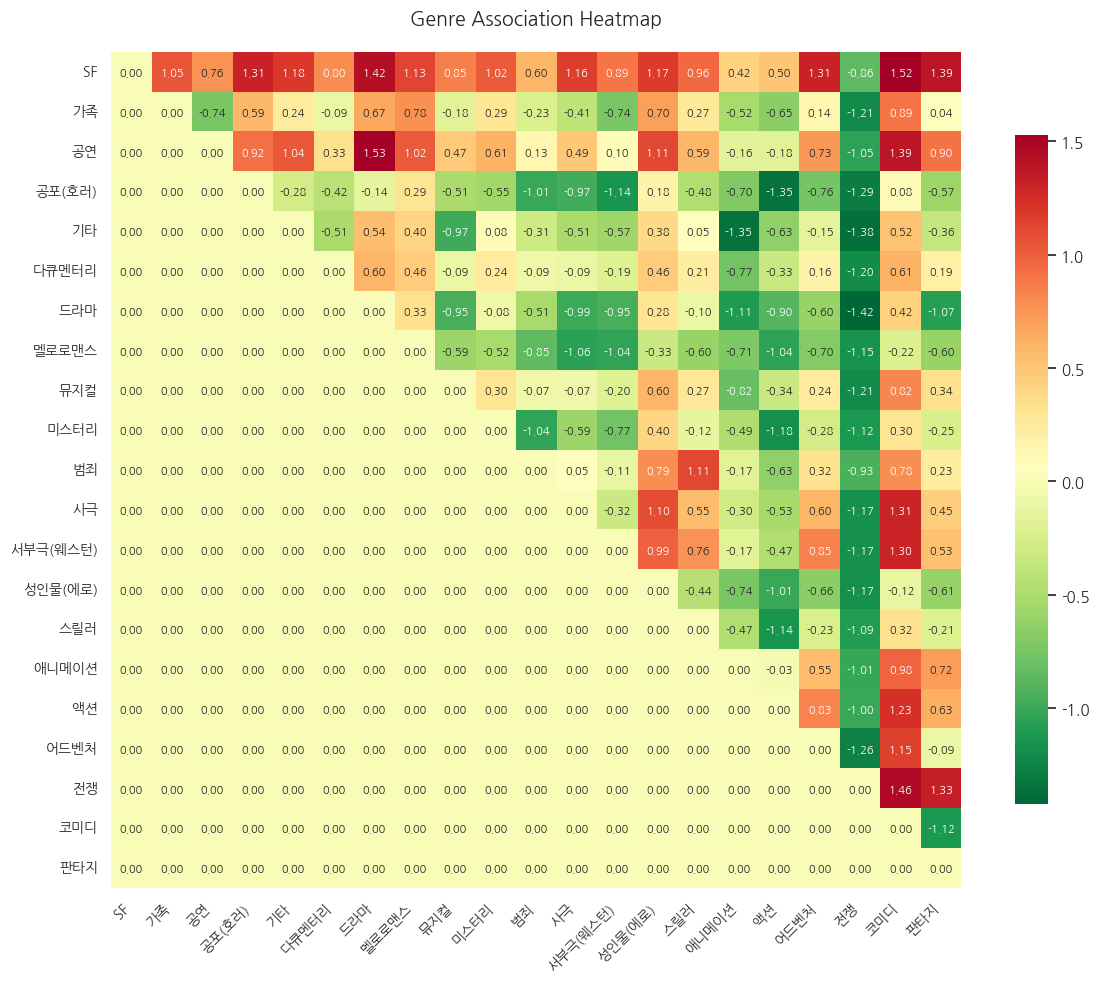

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

# 히트맵 시각화
plt.figure(figsize=(12, 10))  
ax = sns.heatmap(matrix, 
                 xticklabels=genre_name, 
                 yticklabels=genre_name, 
                 annot=True, 
                 fmt='.2f',  
                 annot_kws={"size": 8}, 
                 cmap='RdYlGn_r', 
                 cbar_kws={'shrink': 0.8})  

# x축, y축 라벨 회전
plt.xticks(rotation=45, ha='right', fontsize=10)  # x축 라벨 각도와 정렬
plt.yticks(fontsize=10)  # y축 라벨 크기 조정

# 제목 설정 
plt.title("Genre Association Heatmap", fontsize=14, pad=20)

# 히트맵 출력
plt.tight_layout()  # 레이아웃 조정 
plt.show()